# Modelling Dengue Fever in San Juan & Iquitos

![Image of Mosquito for Dengue](https://loopnewslive.blob.core.windows.net/liveimage/sites/default/files/2018-10/NQJ9VxkF9g.jpg)

# Introduction & Background

Dengue is fast emerging pandemic-prone viral mosquito borne infection that occurs in tropical and subtropical parts of the world. It flourishes in urban poor areas, suburbs and the countryside but also affects more affluent neighbourhoods in tropical and subtropical countries.

It causes a flu-like illness and, sometimes causing a potentially lethal complication called severe dengue. Severe dengue (previously known as dengue haemorrhagic fever) was first recognized in the 1950s during dengue epidemics in the Philippines and Thailand. *("What is dengue?", 2018)*

The incidence of dengue has increased 30-fold over the last 50 years. Up to 50-100 million infections are now estimated to occur annually in over 100 endemic countries, putting almost half of the world’s population at risk. *("What is dengue?", 2018)*

Today dengue affects Asian and Latin American countries and has become a leading cause of hospitalization and death among children and adults in these regions, with many of the nearly half billion cases per year occurring in Latin America.

>Below is are 2 map showing the spread of Dengue in the world and in south america. As you can see it impacts the tropical and sub-tropical belt of the world the most.

![Dengue World Map](http://www.moustiquesolutions.com/img/cms/Dengue-Map-World.jpg)

![Image of Dengue in the Latin America](https://www.dw.com/image/17699978_401.png)

> **Our task for this assignment is to:
Predict the number of dengue cases each week (in each location) based on environmental variables describing changes in temperature, precipitation, vegetation, and more.**

***Before we explored the data and made our models, we needed to gain domain knowledge. This would help us understand how dengue spreads and grows through an area and help us with creating more accurate models. Below is the require domain knowledge necessary to understand our analysis and models.***

# Dengue & Humans

The full life cycle of dengue fever virus involves the role of mosquito as a transmitter (or vector) and humans as the main victim and source of infection. The dengue virus (DEN) comprises four distinct serotypes (DEN-1, DEN-2, DEN-3 and DEN-4) which belong to the genus Flavivirus, family Flaviviridae. *("What is dengue?", 2018)*

Once infected by the bite of the female Aedes mosquito, humans become the main carriers and multipliers of the virus, serving as a source of the virus for uninfected mosquitoes. The virus circulates in the blood of an infected person for 2-7 days, at approximately the same time that the person develops a fever.  *("What is dengue?", 2018)*

Patients who are already infected with the dengue virus can transmit the infection via Aedes mosquitoes after the first symptoms appear and this is the main method by which the Aedes mosquito acquires the virus i.e while feeding on the blood of an infected person. *("What is dengue?", 2018)* 

For Dengue to transmit through there must be sufficient contact between infected humans, vector mosquito species, and susceptible humans to sustain transmission. This is why transmission in the U.S. is rare. However in more tropical countries which have higher population densities dengue spreads at a much faster.  *("Dengue and Climate | Dengue | CDC", 2018)*

The key humans factors impacting the growth of dengue are: 
*("Dengue and Climate | Dengue | CDC", 2018)*

- Population growth 
- Urbanization
- Lack of sanitation
- Expansion of international travel and trade *("WHO | Better environmental management for control of dengue", 2018)*
- Ineffective mosquito control
- Increased reporting capacity.


# Dengue & Climate
Aedes mosquitoes, are highly sensitive to environmental conditions. Temperature, precipitation, and humidity are critical to mosquito survival, reproduction, and development and can influence mosquito presence and abundance. *("Dengue and Climate | Dengue | CDC", 2018)*

Additionally, higher temperatures reduce the time required for the virus to replicate and disseminate in the mosquito. This process, referred to as the “extrinsic incubation period”, must occur before the virus can reach the mosquitoes salivary glands and be transmitted to humans. If the mosquito becomes infectious faster because temperatures are warmer, it has a greater chance of infecting a human before it dies. *("Dengue and Climate | Dengue | CDC", 2018)*

The key climate factors impacting the growth of dengue are:
- Temperature
- Precipitation
- Humidity 

# Bibliography
- WHO | Better environmental management for control of dengue. (2018). Retrieved from http://www.who.int/heli/risks/vectors/denguecontrol/en/

- What is dengue?. (2018). Retrieved from http://www.who.int/denguecontrol/disease/en/

- Dengue and Climate | Dengue | CDC. (2018). Retrieved from https://www.cdc.gov/dengue/entomologyecology/climate.html

We also read the following articles to get a better understanding of how scholars have previously modelled dengue: 

- [Local and Global Effects of Climate on Dengue Transmission in Puerto Rico](https://journals.plos.org/plosntds/article?id=10.1371/journal.pntd.0000382)

- [You have access
Climate change influences on global distributions of dengue and chikungunya virus vectors](http://rstb.royalsocietypublishing.org/content/370/1665/20140135.full)

In [12]:
#Libraries Required
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [13]:
######################################################################################################
# SETUP
######################################################################################################

In [14]:
data_features = pd.read_csv('./data/dengue_features_train.csv')

In [15]:
data_labels = pd.read_csv('./data/dengue_labels_train.csv')

In [16]:
data = pd.merge(data_features, data_labels)

# DATA PREPARATION
for data exploration

In [17]:
# Referred to https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values
np.random.seed(0)

## Sample of Data

In [18]:
# We take a look at a sample of our data
data.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
511,sj,2000,8,2000-02-26,NaN,0.207500,0.150757,0.146917,7.67,297.088571,...,74.064286,7.67,13.670000,1.985714,24.771429,6.628571,28.3,20.6,3.8,4
961,iq,2000,51,2000-12-23,0.265014,0.169057,0.234867,0.302243,3.90,300.411429,...,60.641429,3.90,13.188571,13.000000,28.200000,12.283333,35.0,21.0,0.0,0
231,sj,1994,40,1994-10-08,NaN,NaN,NaN,NaN,0.63,300.377143,...,74.117143,0.63,16.744286,2.628571,28.714286,6.900000,34.4,24.4,8.2,426
687,sj,2003,29,2003-07-16,-0.056750,-0.112667,0.224871,0.186900,62.57,300.154286,...,79.744286,62.57,17.724286,1.914286,27.471429,5.885714,31.7,21.7,43.0,25
34,sj,1990,52,1990-12-24,0.302500,0.277233,0.171267,0.161622,0.00,298.038571,...,69.681429,0.00,13.682857,2.285714,25.157143,5.842857,28.9,21.1,20.9,27


In [ ]:
# Number of missing data points for each column

## Missing Value Count for Each Column

From above we can see that there are missing values for some columns. We will now check the number of missing values in each column.

In [43]:
missing_values_count = data.isnull().sum()
missing_values_count

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

**The Percent of Data which is missing from our dataset**

In [44]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

1.5054945054945055

**If you look above at the results we got we have missing values (NaN) for the climate variables. In the exploratory data analysis steps we we have used Forward Fill to replace these missing values.**

In [45]:
#Replacing na values with NaN
#data = data.fillna(method = 'ffill')

**We will standardise our values during our exploratory data analysis as we are splitting the dataset into 2, one dataset for each city.**

# EXPLORATORY DATA ANALYSIS

In [46]:
######################################################################################################
# EDA - Exploratory Data Analysis
######################################################################################################

**Before we look at the dataset it is important that we understand the meaning of each column name**

**City and Date Indicators**
- **city** – City abbreviations: sj for San Juan and iq for Iquitos
- **year** - Year
- **weekofyear** - Week Number 
- **week_start_date** – Date given in yyyy-mm-dd format
- **total_cases** - Total Cases for that week
---
**Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements**
- **ndvi_ne** – Pixel northeast of city centroid
- **ndvi_nw** – Pixel northwest of city centroid
- **ndvi_se** – Pixel southeast of city centroid
- **ndvi_sw** – Pixel southwest of city centroid
---
**PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)**

- **precipitation_amt_mm – Total precipitation**

**NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)**

- **reanalysis_sat_precip_amt_mm** – Total precipitation
- **reanalysis_dew_point_temp_k** – Mean dew point temperature
- **reanalysis_air_temp_k** – Mean air temperature
- **reanalysis_relative_humidity_percent** – Mean relative humidity
- **reanalysis_specific_humidity_g_per_kg** – Mean specific humidity
- **reanalysis_precip_amt_kg_per_m2** – Total precipitation
- **reanalysis_max_air_temp_k** – Maximum air temperature
- **reanalysis_min_air_temp_k** – Minimum air temperature
- **reanalysis_avg_temp_k** – Average air temperature
- **reanalysis_tdtr_k** – Diurnal temperature range

**NOAA's GHCN daily climate data weather station measurements**

- **station_max_temp_c** – Maximum temperature
- **station_min_temp_c** – Minimum temperature
- **station_avg_temp_c** – Average temperature
- **station_precip_mm** – Total precipitation
- **station_diur_temp_rng_c** – Diurnal temperature range

## Our Data Types

In [47]:
data.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

## Our Dataset

In [49]:
display(data)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


## EXPLORING TOTAL CASES WITH TIME

**Our first step in exploring the data was to see Dengue changed with time. The reason we decided on this was to see how Dengue changed with time and if there was any seasonality.**




### Facet Scatter Plot of Total Cases in each Week

We first made a facet scatter plot of total cases in each city by week so that we could look for significant changes in the total cases. 

**Key Insight:**

- There appears to be a significant change in the total number of cases during the latter half of the weeks of the year.

**While the facet scatter plot has helped us identify the change, it will help to map this out through a simple facet chart of total cases in each City**

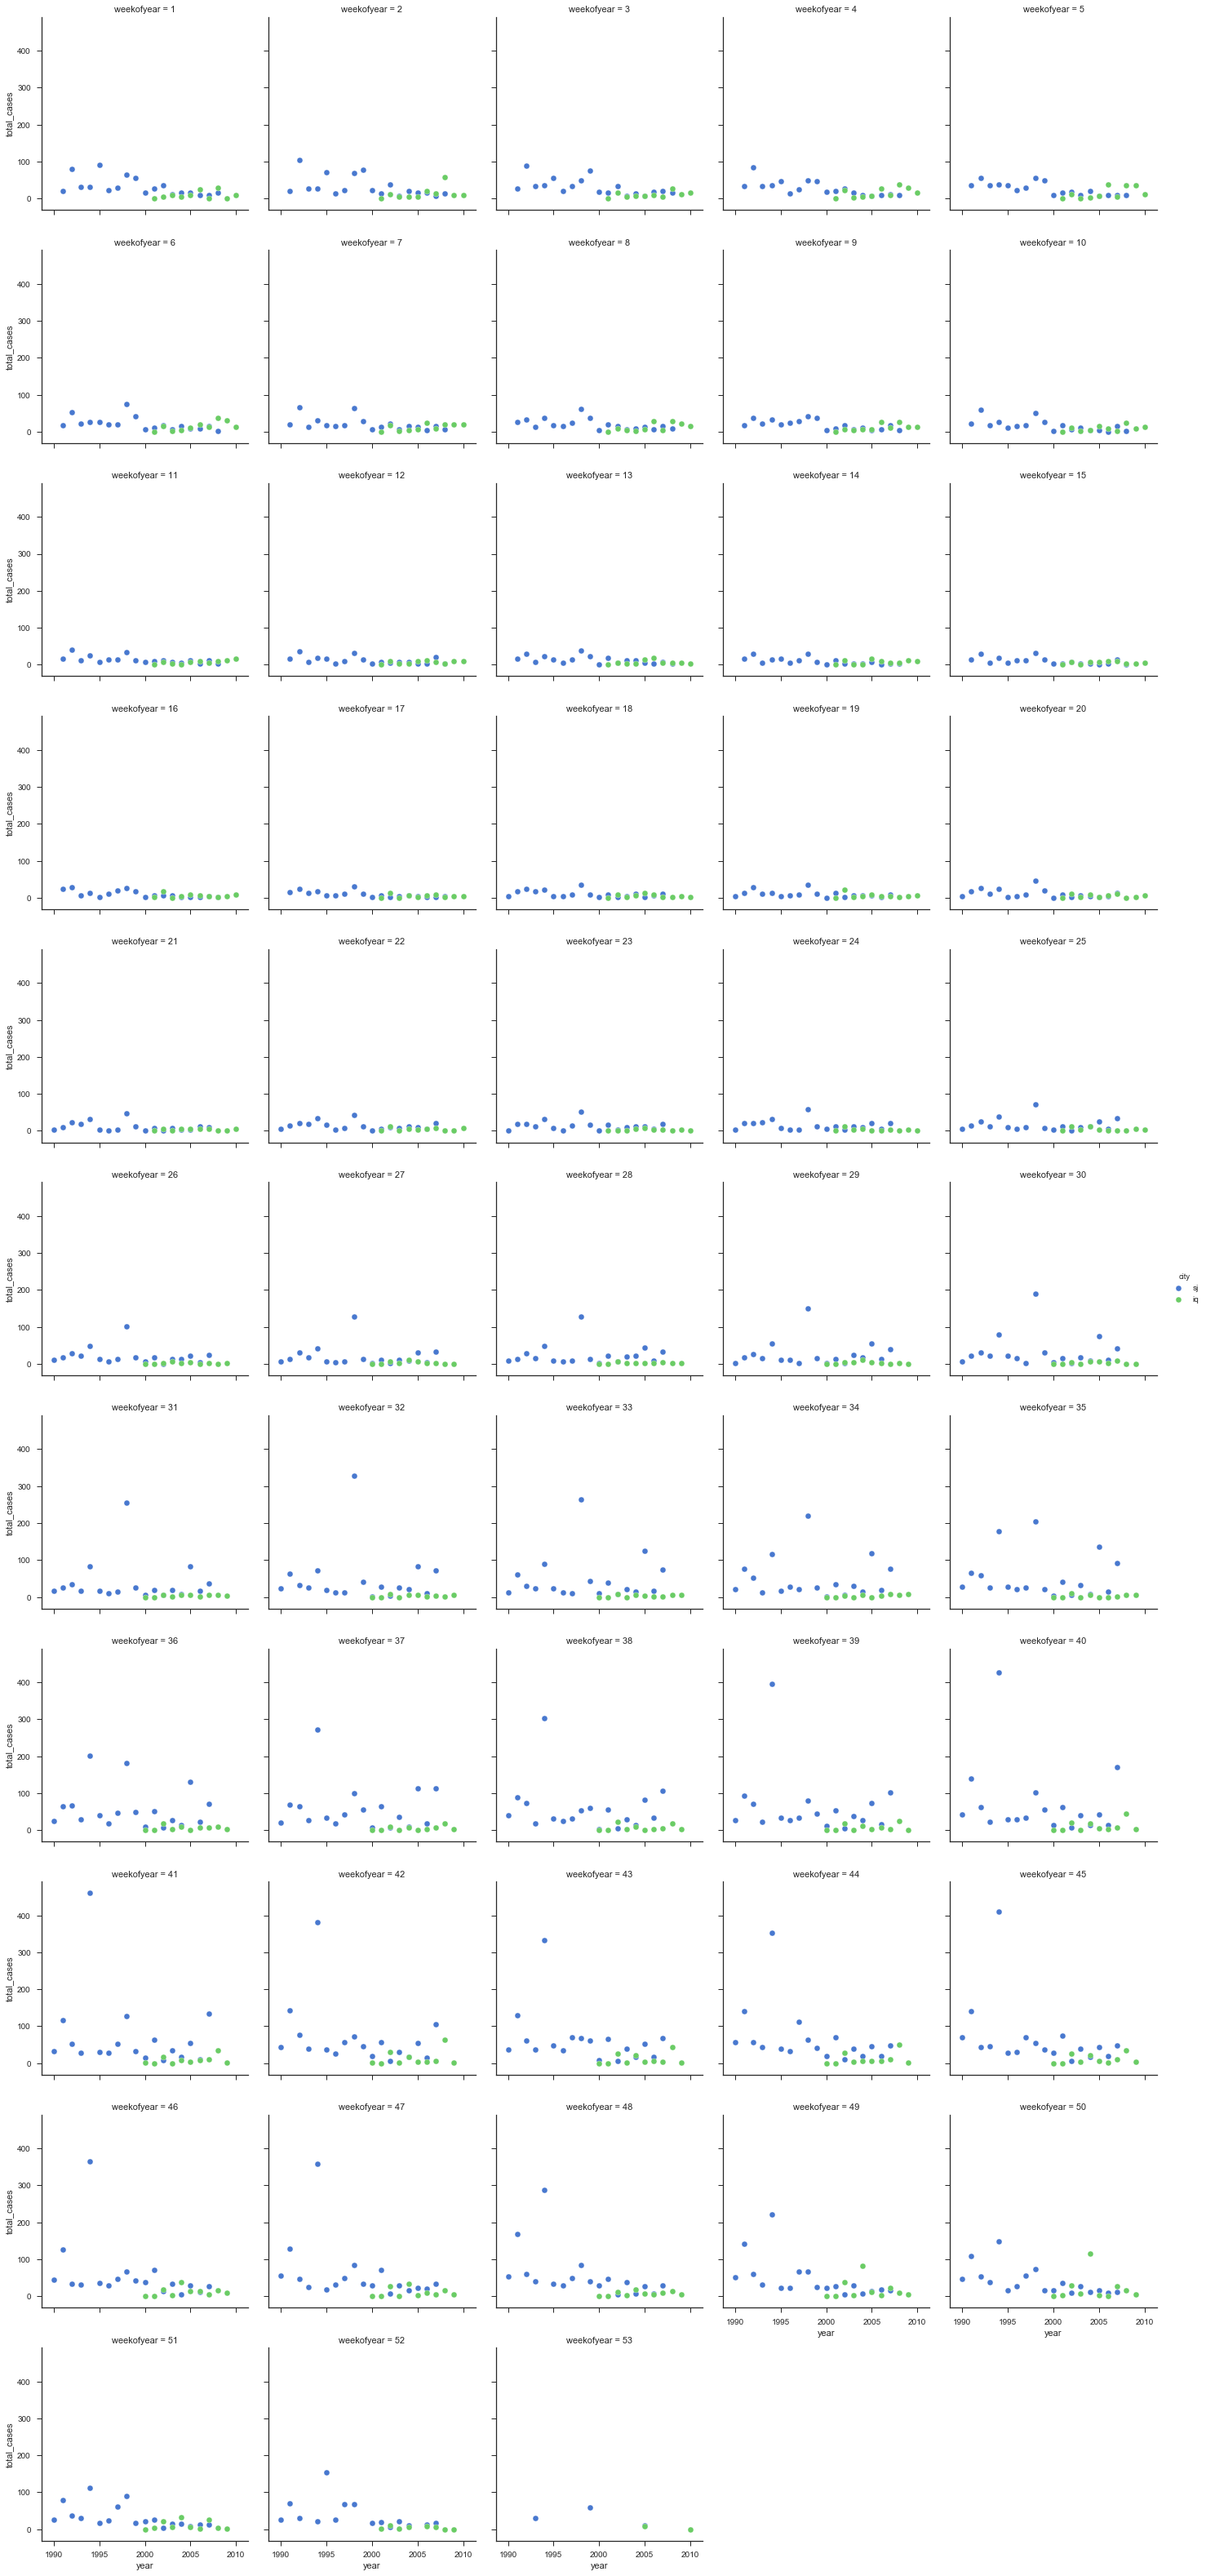

In [51]:
sns.set(style="ticks", palette="muted")
g = sns.FacetGrid(data, col="weekofyear",  hue="city", col_wrap=5, size=4)
g = (g.map(plt.scatter, "year", "total_cases", edgecolor="w").add_legend())

### Simplified Facet Scatter Chart of Total Cases in each City by Week


**Key Insights:**

- In San Juan, for weeks 25 - 50, we can see there are outliers where the numbers of cases is larger than the normal amount of cases. This can be due to an outbreak in the city on different occassions. 

- We also notice that in Iquitos there have been no outbreaks and the number of cases remain almost the same throughout the year.

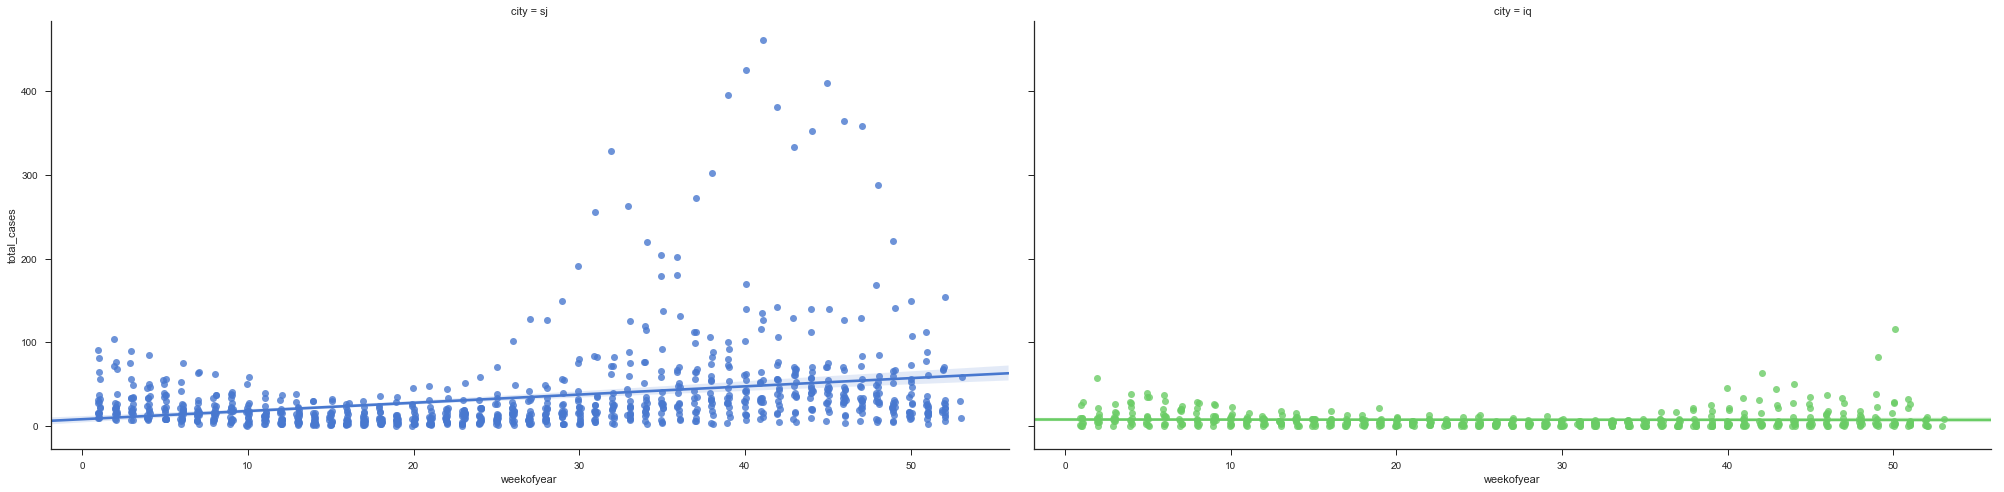

In [57]:
g = sns.lmplot(x="weekofyear", y="total_cases", hue="city", col="city", data=data, aspect= 2, size = 7, x_jitter=.1)

### Line Chart of The Growth of Dengue with Time in Each City

While the previous graph helped us identify outbreaks in each city, it is important to map out the growth of Dengue with Time for each city together and see the general trend line with the upper and lower bounds. This can help us identify seasonality.

**Key Insights:**

- In San Juan, year over year we can see an increase in the total cases starting Week 24, which rollsover to Week 11 in the next year

- In Iquitos, year over year we can see a minor increase in total cases starting in Week 35 to Week 10 in the next year (with a significant increase for weeks 48 to 51 (peak of the season))

- Iquitos, has much lower number of total cases than San Juan

Text(0.5,1,'Growth of Dengue with Time - Weekly Breakdown for all years - Blue: San Juan / Green: Iquitos')

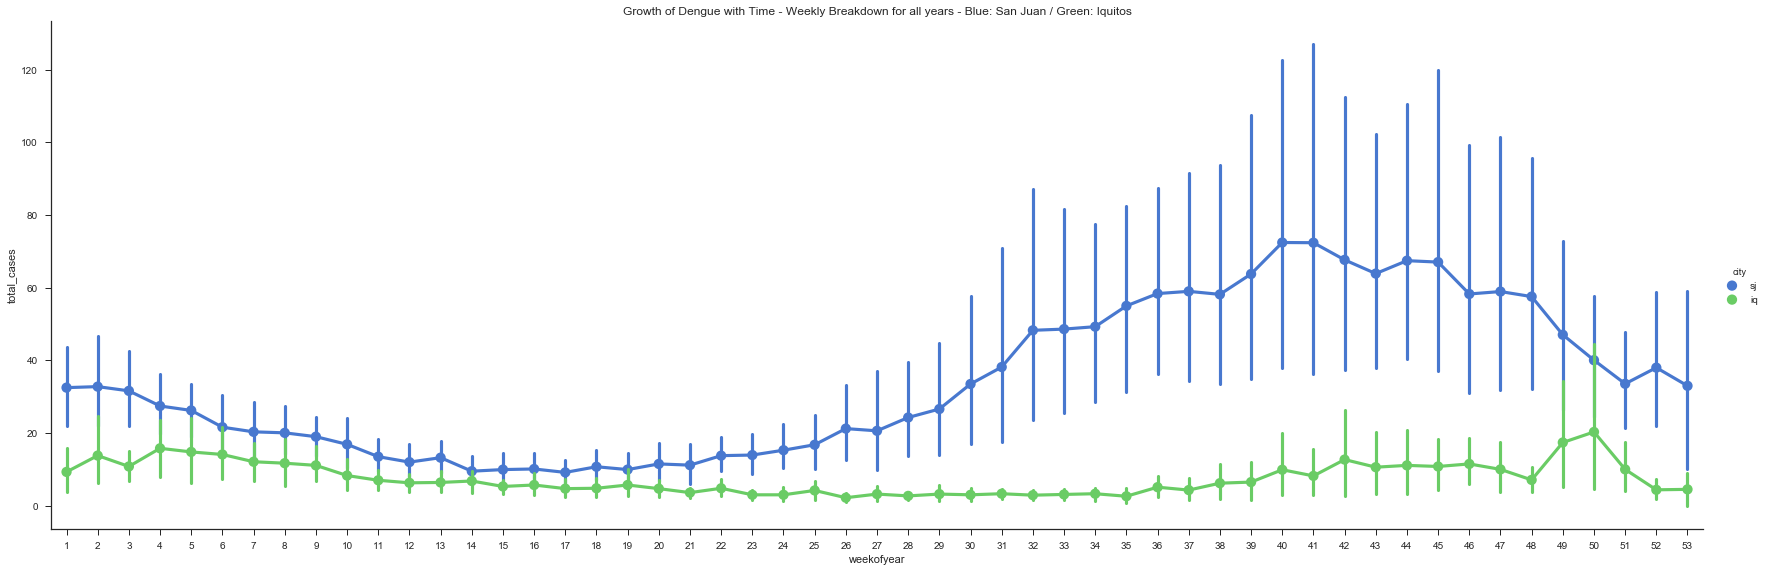

In [51]:
sns.factorplot(x="weekofyear", y="total_cases", hue="city", size=8, aspect=3,data=data)
plt.title("Growth of Dengue with Time - Weekly Breakdown for all years - Blue: San Juan / Green: Iquitos")

## EXPLORING THE CLIMATE VARIABLES

> **Earlier we had read in the Domain Knowledge section that climate variables play a key role in influencing the growth of Dengue. Therefore we decided to investigate if the climate conditions are different for both cities provided. If the climatic conditions are different we will split the dataset. Hence we are going to investigate the change in temperature & precipitation for each week**



### Line Chart of Change in Temperature with Time for each Week

**Key Insights:**

- For San Juan, there is a significant change in temperature starting from week 10 and peaks during week 37 and gradually decreases through week 37 to 49

- For Iquitos we can observe three things:
    - the difference between the upper and lower bound temperatures for each week is much larger than for San Juan
    - there is a significant drop in temperature from Week 19 to Week 31
    - there is a significant climb in temperature which begins starting week 30 which steadies by week 40

Text(0.5,1,'Average Temperature Change with Time - Weekly Breakdown for All Years - Blue: San Juan / Green: Iquitos ')

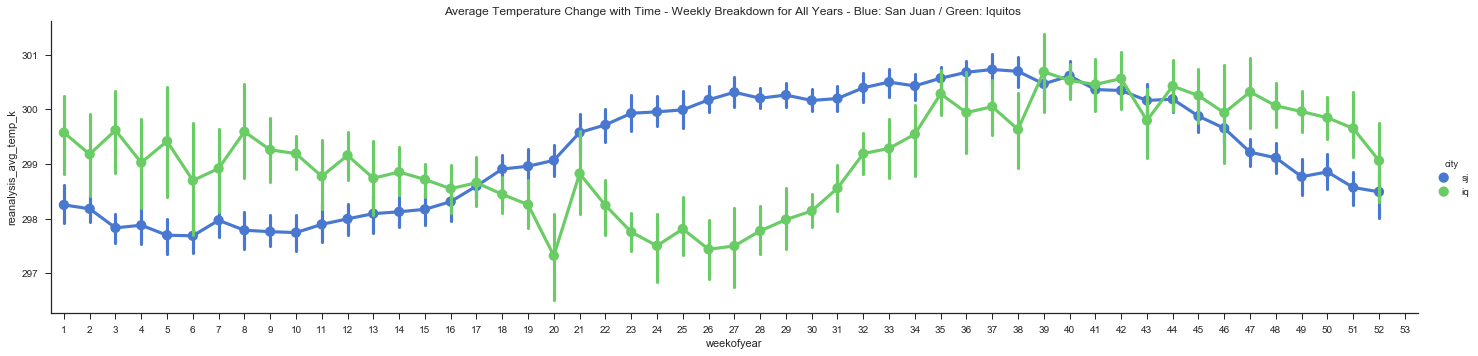

In [55]:
sns.factorplot(x="weekofyear", y="reanalysis_avg_temp_k", hue="city", size=5, aspect=4,data=data)
plt.title("Average Temperature Change with Time - Weekly Breakdown for All Years - Blue: San Juan / Green: Iquitos ")

### Line Chart of Change in Precipitation (Rainfall) with Time for each Week

**Key Insights from both charts below:**

- San Juan receives heavy rainfall from week 14 to week 47
- Iquitos receives a steady amount of rainfall throughout the year with it's peak season from week 8 to week 20

### Facet Scatter Chart of Rainfall per week in each city

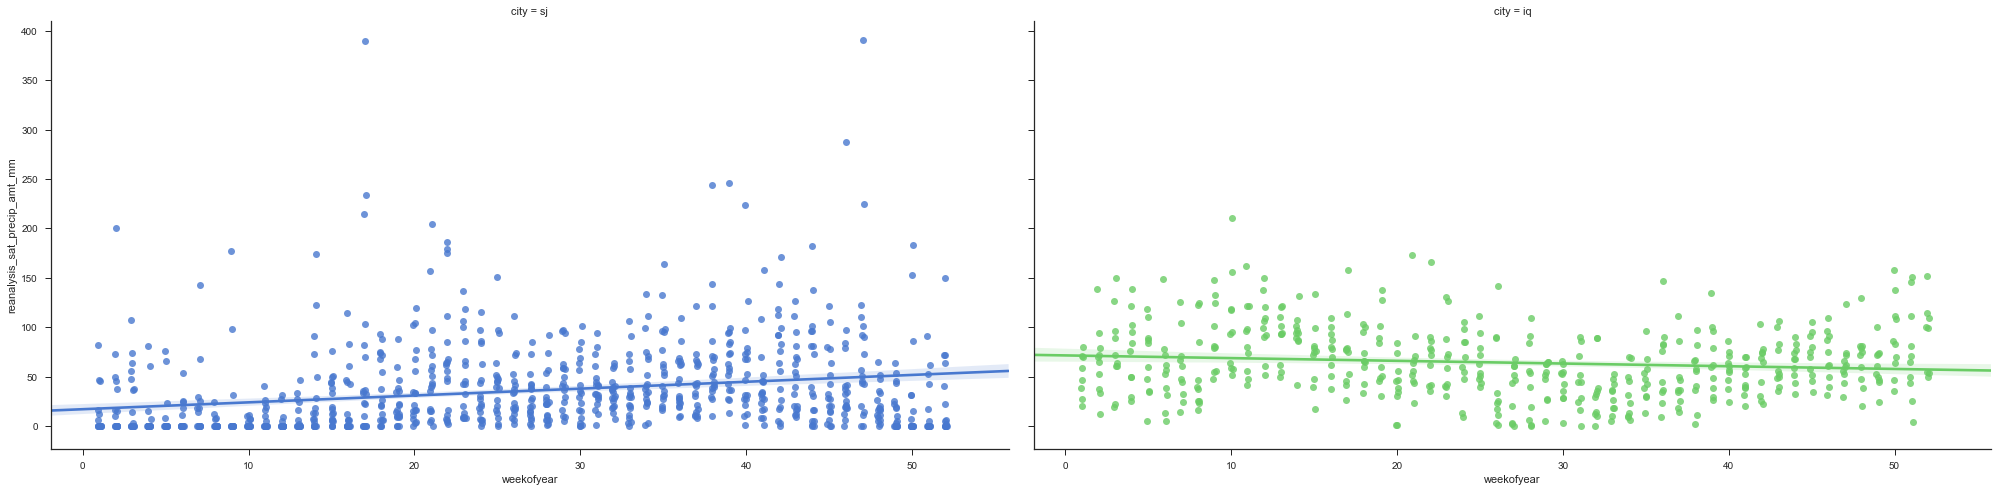

In [56]:
g = sns.lmplot(x="weekofyear", y="reanalysis_sat_precip_amt_mm", hue="city", col="city", data=data, aspect= 2, size = 7, x_jitter=.1)

### Line Chart of Rainfall per week for each city

Text(0.5,1,'Precipitation Change with Time - Weekly Breakdown - for all years - Blue: San Juan / Green: Iquitos ')

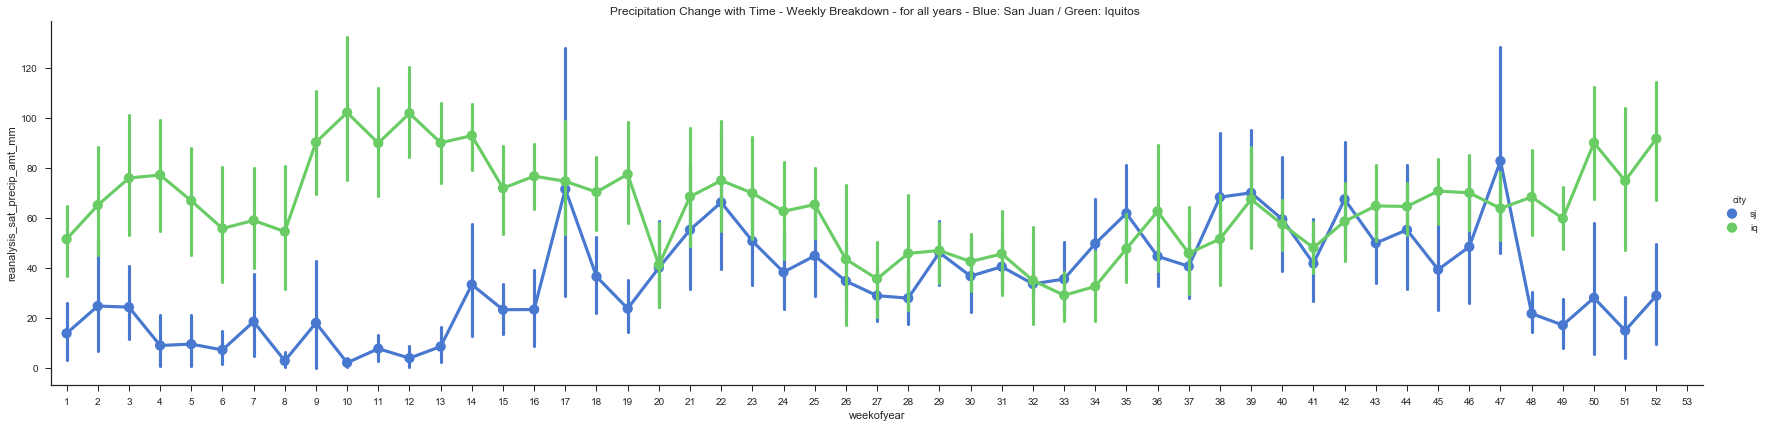

In [58]:
sns.factorplot(x="weekofyear", y="reanalysis_sat_precip_amt_mm", hue="city", size=6, aspect=4,data=data)
plt.title("Precipitation Change with Time - Weekly Breakdown - for all years - Blue: San Juan / Green: Iquitos ")

# Data Modelling

We will split the data into two city datasets - San Juan & Iquitos to get detailed visual insights and see the summary statistics of each city in more detail. This is because our hypothesis is that there is a difference in the environmental factors in each city (as we have seen from the graphs above). 

The total number of cases reported for each week indicate when patients began to get diagnosed. However the increase of cases do not indicate the start of the dengue season. The dengue season starts with the laying of mosquito eggs, hatching and mass transmission of dengue from human to mosquito. 

After extensive research in our background domain knowledge and considering various factors we decided to shift our data 10 weeks ahead to factor in the onset of rain, eggs, hatching and transmission and drop the last 10 rows from our dataset. After doing this we were able to see the data correlate much better as well.

We also referred to:

* https://www.researchgate.net/publication/324150583_Predictive_Modeling_of_Dengue_Fever_Epidemics_A_Neural_Network_Approach
* http://www.who.int/en/news-room/fact-sheets/detail/dengue-and-severe-dengue

In [6]:
data_features_sj = data_features[data_features.city=='sj'].reset_index(drop = True)
data_features_iq = data_features[data_features.city=='iq'].reset_index(drop = True)

In [12]:
###########################################################
# DATA PREP FOR MODELLING
###########################################################

In [7]:
### San Juan ###
#Labels data for San Juan
data_labels_sj = data_labels[data_labels.city=='sj'].reset_index(drop = True)

#Take yearly sum for dengue cases
data_labels_sj_year = data_labels_sj.groupby(['year'])['total_cases'].sum().to_frame(name = 'annual_cases').reset_index()

#Merge yearly dengue cases with the weekly cases
data_labels_sj = pd.merge(data_labels_sj, data_labels_sj_year)

#Divide weekly cases with the yearly cases to get weekly dengue cases percentage
data_labels_sj['pct_cases_year'] = data_labels_sj['total_cases'] / data_labels_sj['annual_cases']

#Shifting dengue cases backward by 10 weeks period
data_labels_sj = data_labels_sj.shift(periods = -10)

#Merge dengue cases with the weekly climate variables
data_sj = pd.merge(data_features_sj, data_labels_sj, on=['city', 'year', 'weekofyear'], left_index=True, right_index=True)

#Drop last 10 rows as shifting data by 10 weeks created NaN at the end of dataset
data_sj.drop(data_sj.tail(10).index, inplace=True)

#Fill the missing values using forward fill
data_sj = data_sj.fillna(method = 'ffill')

#Drop the columns which correlate ~ 100 with columns having similar data
data_sj = data_sj.drop(columns=['reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg'])

In [8]:
### Iquitos ###
#Labels data for Iquitos
data_labels_iq = data_labels[data_labels.city=='iq'].reset_index(drop = True)

#Take yearly sum for dengue cases
data_labels_iq_year = data_labels_iq.groupby(['year'])['total_cases'].sum().to_frame(name = 'annual_cases').reset_index()

#Merge yearly dengue cases with the weekly cases
data_labels_iq = pd.merge(data_labels_iq, data_labels_iq_year)

#Divide weekly cases with the yearly cases to get weekly dengue cases percentage
data_labels_iq['pct_cases_year'] = data_labels_iq['total_cases'] / data_labels_iq['annual_cases']

#Shifting 10 weeks for cases
data_labels_iq = data_labels_iq.shift(periods = -10) 
#Merge dengue cases with the weekly climate variables
data_iq = pd.merge(data_features_iq, data_labels_iq, on=['city', 'year', 'weekofyear'], left_index=True, right_index=True)
#Drop last 10 rows as shifting data by 10 weeks created NaN at the end of dataset
data_iq.drop(data_iq.tail(10).index, inplace=True)
#Fill the missing values using forward fill
data_iq = data_iq.fillna(method = 'ffill')
#Drop the columns which correlate ~ 100 with columns having similar data
data_iq = data_iq.drop(columns=['reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg'])

## Univariate Analysis for Each City

### SAN JUAN

- For the San Juan Dataset we have the total cases for each week from 1990 to 2008. 
- Our dataset has 926 rows and 26 columns.

In [10]:
data_sj.shape

(926, 25)

In [11]:
display(data_sj)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,annual_cases,pct_cases_year
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,2.628571,25.442857,6.900000,29.4,20.0,16.0,8.0,866.0,0.009238
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,2.371429,26.714286,6.371429,31.7,22.2,8.6,2.0,866.0,0.002309
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,2.300000,26.714286,6.485714,32.2,22.8,41.4,6.0,866.0,0.006928
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,2.428571,27.471429,6.771429,33.3,23.3,4.0,17.0,866.0,0.019630
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,3.014286,28.942857,9.371429,35.0,23.9,5.8,23.0,866.0,0.026559
5,sj,1990,23,1990-06-04,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,2.100000,28.114286,6.942857,34.4,23.9,39.1,13.0,866.0,0.015012
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,2.042857,27.414286,6.771429,32.2,23.3,29.7,21.0,866.0,0.024249
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,1.571429,28.371429,7.685714,33.9,22.8,21.1,28.0,866.0,0.032333
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,1.885714,28.328571,7.385714,33.9,22.8,21.1,24.0,866.0,0.027714
9,sj,1990,27,1990-07-02,0.102450,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,2.014286,28.328571,6.514286,33.9,24.4,1.1,20.0,866.0,0.023095


### Summary Statistics for San Juan

In [61]:
display(data_sj.describe().T)

,count,mean,std,min,25%,50%,75%,max
year,926.0,1998.727862,5.151690,1990.000000,1994.000000,1999.000000,2003.000000,2008.000000
weekofyear,926.0,26.654428,15.028816,1.000000,14.000000,27.000000,40.000000,53.000000
ndvi_ne,926.0,0.059206,0.103863,-0.406250,0.006100,0.056800,0.110792,0.493400
ndvi_nw,926.0,0.067757,0.091061,-0.456100,0.017475,0.068675,0.114212,0.437100
ndvi_se,926.0,0.176242,0.057414,-0.015533,0.137898,0.175757,0.211129,0.393129
ndvi_sw,926.0,0.166175,0.055658,-0.063457,0.129786,0.167514,0.202207,0.381420
precipitation_amt_mm,926.0,35.646069,44.772678,0.000000,0.000000,20.940000,52.327500,390.600000
reanalysis_air_temp_k,926.0,299.173608,1.234225,295.938571,298.211429,299.277857,300.137143,302.200000
reanalysis_avg_temp_k,926.0,299.286964,1.216337,296.114286,298.328571,299.385714,300.233929,302.164286
reanalysis_dew_point_temp_k,926.0,295.129937,1.558144,289.642857,293.887143,295.475000,296.420000,297.795714


### IQUITOS

- For the Iquitos Dataset we have the total cases for each week from 1990 to 2008. 
- Our dataset has 510 rows and 25 columns.

In [26]:
data_iq.shape

(510, 25)

In [27]:
display(data_iq)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,annual_cases,pct_cases_year
0,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,8.928571,26.400000,10.775000,32.5,20.7,3.0,1.0,4.0,0.250000
1,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,10.314286,26.900000,11.566667,34.0,20.8,55.6,0.0,4.0,0.000000
2,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,7.385714,26.800000,11.466667,33.0,20.7,38.1,0.0,4.0,0.000000
3,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,9.114286,25.766667,10.533333,31.5,14.7,30.0,0.0,4.0,0.000000
4,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,9.500000,26.600000,11.480000,33.3,19.1,4.0,0.0,4.0,0.000000
5,iq,2000,31,2000-08-05,0.205529,0.190757,0.231671,0.255314,16.24,297.191429,...,74.728571,13.771429,25.340000,10.940000,32.0,17.0,11.5,1.0,4.0,0.250000
6,iq,2000,32,2000-08-12,0.312486,0.329986,0.380586,0.387271,89.37,297.320000,...,83.275714,11.471429,27.016667,11.650000,34.0,19.9,72.9,1.0,4.0,0.250000
7,iq,2000,33,2000-08-19,0.384133,0.392240,0.341780,0.382750,42.08,297.627143,...,82.490000,13.700000,26.583333,10.316667,33.0,20.5,50.1,0.0,4.0,0.000000
8,iq,2000,34,2000-08-26,0.408157,0.322157,0.406714,0.302714,49.22,298.238571,...,74.740000,13.771429,26.900000,13.400000,34.0,19.0,89.2,0.0,4.0,0.000000
9,iq,2000,35,2000-09-02,0.332043,0.321057,0.314614,0.324257,53.65,299.218571,...,74.151429,12.457143,27.116667,12.266667,34.0,20.0,78.0,0.0,4.0,0.000000


#### Summary Statistics for Iquitos

In [29]:
data_iq.describe().T

,count,mean,std,min,25%,50%,75%,max
year,510.0,2004.901961,2.860578,2000.000000,2002.000000,2005.000000,2007.000000,2010.000000
weekofyear,510.0,26.621569,15.147212,1.000000,13.000000,27.000000,40.000000,53.000000
ndvi_ne,510.0,0.263832,0.081982,0.061729,0.199636,0.265379,0.320121,0.508357
ndvi_nw,510.0,0.238898,0.077068,0.035860,0.179780,0.232498,0.294111,0.454429
ndvi_se,510.0,0.250132,0.077947,0.029880,0.194336,0.248950,0.303050,0.538314
ndvi_sw,510.0,0.266681,0.086791,0.064183,0.202536,0.262221,0.325059,0.546017
precipitation_amt_mm,510.0,64.496333,35.338576,0.000000,39.122500,60.490000,86.095000,210.830000
reanalysis_air_temp_k,510.0,297.869381,1.175840,294.635714,297.088929,297.822857,298.650714,301.637143
reanalysis_avg_temp_k,510.0,299.134188,1.337791,294.892857,298.221429,299.121429,300.133929,302.928571
reanalysis_dew_point_temp_k,510.0,295.486933,1.416141,290.088571,294.593214,295.842143,296.545357,298.450000


## Checking for Correlation between the columns

### San Juan

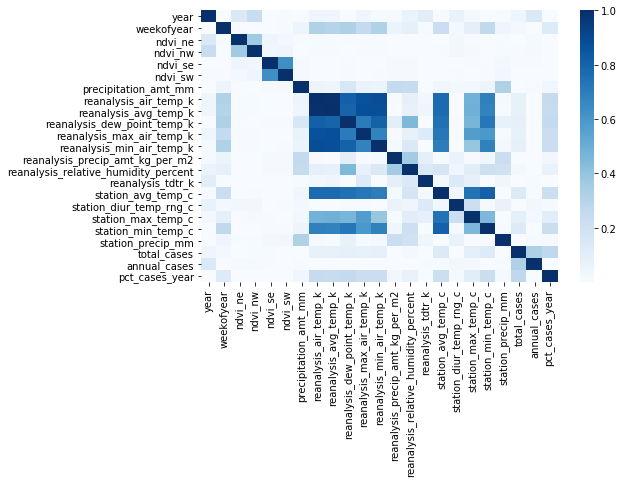

In [12]:
plt.subplots(figsize=(8,5))
sns.heatmap(data_sj.corr()**2, cmap='Blues')

### Iquitos

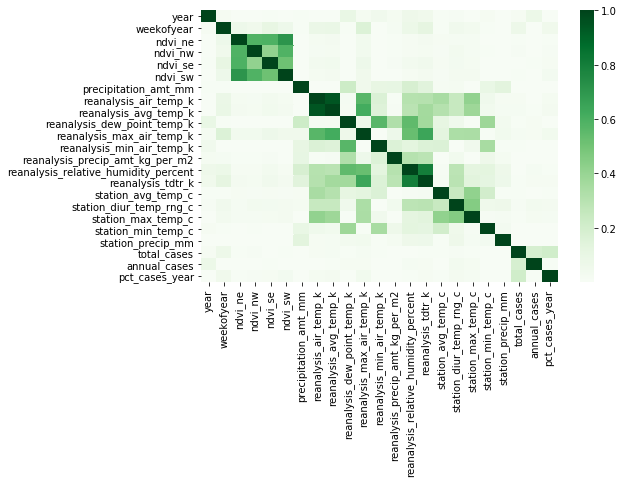

In [13]:
plt.subplots(figsize=(8,5))
sns.heatmap(data_iq.corr()**2, cmap='Greens')

## Correlation for Dengue Cases
The graphs below represent correlation of the dependent variable 'Dengue Cases' with the environmental and climate variables in San Juan and Iquitos. We checked the correlation between the given variables with the percent dengue cases each week with respect to year. Using weekly dengue cases percentage values we standardized the data resulting in better correlation with the variables. Since the region and climate of two cities is different, we can see there is a significant difference in the correlation behavior of our variables among two cities.

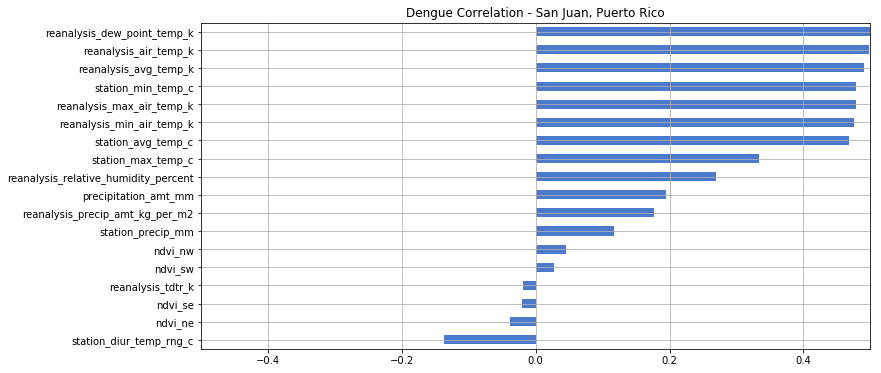

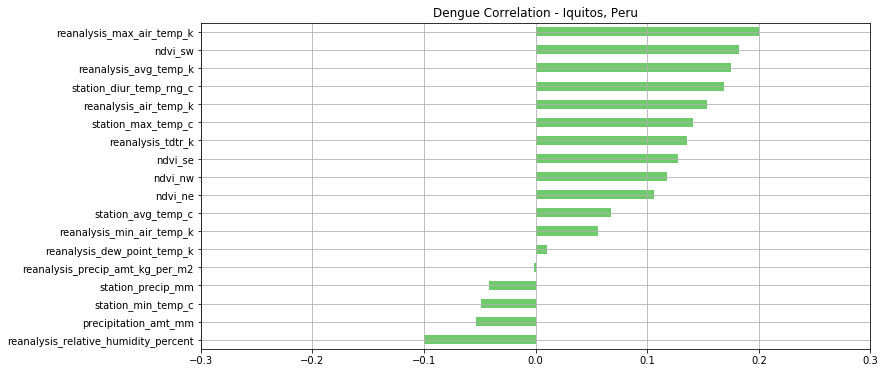

In [14]:
#Code to generate correlation graphs below for the two cities

corr_sj = data_sj.corr(method='pearson')
corr_sj = corr_sj['pct_cases_year'].to_frame(name = 'corr_with_cases_sj')
corr_sj = corr_sj.iloc[2:20]
corr_sj = corr_sj.sort_values(by=['corr_with_cases_sj'])
corr_sj.plot(kind='barh', title='Dengue Correlation - San Juan, Puerto Rico', xlim=(-.5,.5), grid = True, legend = False, color = '#4B7ACC', figsize=(12,6))

corr_iq = data_iq.corr(method='pearson')
corr_iq = corr_iq['pct_cases_year'].to_frame(name = 'corr_with_cases_iq')
corr_iq = corr_iq.iloc[2:20]
corr_iq = corr_iq.sort_values(by=['corr_with_cases_iq'])
corr_iq.plot(kind='barh', title='Dengue Correlation - Iquitos, Peru', xlim=(-.3,.3), grid = True, legend = False, color = '#6ECA6A', figsize=(12,6))

## Negative Binomial Regression
Based on our explanatory data analysis above, we decided to use Negative Binomial Regression for creating the model. It is similar to regular multiple regression except that the dependent (Y) variable is an observed count that follows the negative binomial distribution. Thus, the possible values of Y are the nonnegative integers: 0, 1, 2, 3, and so on.

Negative binomial regression is a generalization of Poisson regression which loosens the restrictive assumption that the variance is equal to the mean made by the Poisson model. In case of dengue prediction, Poisson model may not be a valid choice since there is a huge difference in the mean and variance for both cities:
* Dengue Cases Mean (San Juan) = 34.5
* Dengue Cases Variance (San Juan) = 2659
* Dengue Cases Mean (Iquitos) = 7.71
* Dengue Cases Variance (Iquitos) = 117.0

### Akaike Information Criterion
In order to check the accuracy of our model based on variables used, we looked at AIC (Akaike Information Criterion) which is derived from information theory and it is designed to pick the model that produces a probability distribution with the smallest discrepancy from the true distribution.

Modeling Sources:
* https://www.ncss.com/
* https://www.sciencedirect.com/

# Model - San Juan
Based on the research that climate variables like precipitation, humidity and temperature are key for measuring the dengue outbreak, we considered using those in creating a model. Since there are multiple variables from different sources, we checked the correlation of each variable with dengue cases and shortlisted following that highly correlate with dengue as shown above in the correlation graph for San Juan.
* reanalysis_relative_humidity_percent - Mean relative humidity
* reanalysis_dew_point_temp_k - Mean dew point temperature
* station_min_temp_c - Minimum temperature
* reanalysis_precip_amt_kg_per_m2 - Total precipitation
* station_avg_temp_c - Average temperature
* reanalysis_tdtr_k - Diurnal temperature range

For improving the model, we chose backward elimination of our variables and looked at AIC value of the resulting model. If the AIC increases after removing a variable, we put it back. If the AIC reduces, it tells that the resulting model is closer to the prediction hence we keep the variable that has such effect. We determined that for the city San Juan, there are four variable that predict the best model which are Mean relative humidity, Mean dew point temperature, Average temperature and the Diurnal temperature range.

In [17]:
# Creating Model
gl_model_sj = smf.glm('total_cases ~ reanalysis_relative_humidity_percent + reanalysis_dew_point_temp_k + station_min_temp_c + reanalysis_precip_amt_kg_per_m2 + station_avg_temp_c + reanalysis_tdtr_k', data=data_sj, family=sm.families.NegativeBinomial()).fit()
data_sj['predicted'] = gl_model_sj.predict()
print('AIC:',gl_model_sj.aic)

gl_model_sj = smf.glm('total_cases ~ reanalysis_relative_humidity_percent + reanalysis_dew_point_temp_k + reanalysis_precip_amt_kg_per_m2 + station_avg_temp_c + reanalysis_tdtr_k', data=data_sj, family=sm.families.NegativeBinomial()).fit()
data_sj['predicted'] = gl_model_sj.predict()
print('AIC:',gl_model_sj.aic)

gl_model_sj = smf.glm('total_cases ~ reanalysis_relative_humidity_percent + reanalysis_dew_point_temp_k + station_avg_temp_c + reanalysis_tdtr_k', data=data_sj, family=sm.families.NegativeBinomial()).fit()
data_sj['predicted'] = gl_model_sj.predict()
print('AIC:',gl_model_sj.aic)
gl_model_sj.summary()

AIC: 8072.866937794323
AIC: 8071.498966226671
AIC: 8069.589501931738


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            total_cases   No. Observations:                  926
Model:                            GLM   Df Residuals:                      921
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4029.8
Date:                Tue, 13 Nov 2018   Deviance:                       706.06
Time:                        15:56:46   Pearson chi2:                 1.02e+03
No. Iterations:                     9   Covariance Type:             nonrobust
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               30.8862     15.492      1.994      0.046       0.522      61.251
reanalysis_relative_humidity_percent     0.0281      0.016      1.706      0.088      -0.004       0.060
reanalysis_dew_point_temp_k             -0.1520      0.059     -2.557      0.011      -0.269      -0.035
station_avg_temp_c                       0.5925      0.054     10.930      0.000       0.486       0.699
reanalysis_tdtr_k                       -0.3563      0.079     -4.518      0.000      -0.511      -0.202
========================================================================================================
"""

### Model Observations
* There was an observed association of 0.03 (-0.004, 0.06) dengue cases increase for a unit increase in relative humidity.
* There was an observed association of -0.152 (-0.27, -0.035) dengue cases decrease for a unit increase in dew point temperature.
* There was an observed association of 0.59 (0.48, 0.70) dengue cases increase for a unit increase in average temperature.
* There was an observed association of -0.36 (-0.511, -0.202) dengue cases decrease for a unit increase in diurnal daily temperature. This is an interesting insight because it tells us that dengue cases are more likely to occur if there is smaller variation between the high and low daily temperature in San Juan.

### Scatter Plot of Actual vs Predicted Dengue Cases in San Juan

Looking at the scatter plot of actual vs predicted dengue cases in San Juan shows correlation but there are outliers where we are overpredicting and underpredicting in some cases. 

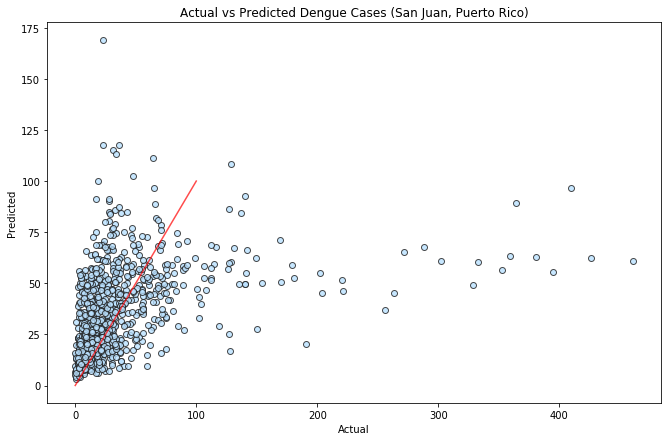

In [37]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (San Juan, Puerto Rico)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(data_sj.total_cases, data_sj.predicted, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.plot([0, 100], [0, 100], 'red', alpha=0.7)

## Prediction Residuals for San Juan
The residuals of our prediction for San Juan dengue cases are clustered near 0 with both the positive and negative values. Using our model, we tried to minimize these values and we can see that most of the cases are predicted within +30 and -30 of the original values. Clearly we can see some residuals are too big which occured due to possible outliers as mentioned in the graph below.

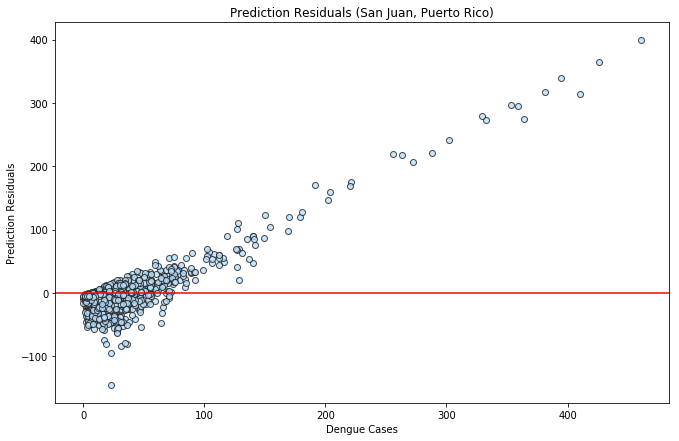

In [17]:
plt.subplots(figsize=(11,7))
plt.title('Prediction Residuals (San Juan, Puerto Rico)')
plt.xlabel('Dengue Cases')
plt.ylabel('Prediction Residuals')
plt.scatter(data_sj.total_cases, data_sj.total_cases - data_sj.predicted, edgecolors = '#1e1e1e', color='#bae1ff', alpha=0.8)
plt.axhline(0, color='red')
plt.show()

From the Chart Below we can see that the predicted trendline fits well with the actual mean line except for weeks around weeks 30 and 40.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


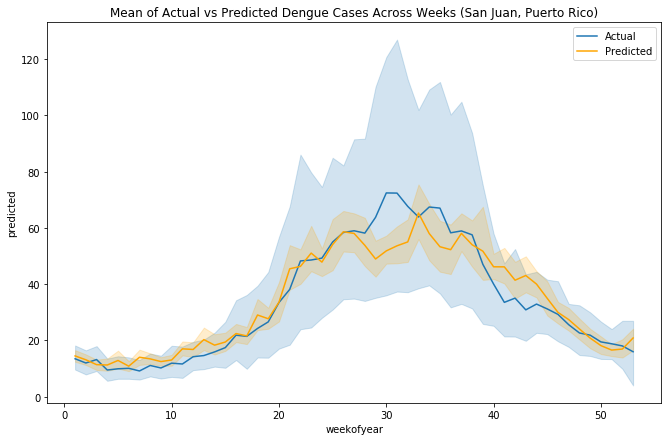

In [18]:
plt.subplots(figsize=(11,7))
plt.title('Mean of Actual vs Predicted Dengue Cases Across Weeks (San Juan, Puerto Rico)')
sns.lineplot(x = 'weekofyear', y = 'total_cases', data = data_sj, label='Actual')
sns.lineplot(x = 'weekofyear', y = 'predicted', data = data_sj, label='Predicted', color='Orange')

# Model for Iquitos

Just like the model for San Juan, we also considered climate variables for Iquitos since precipitation, humidity and temperature are backed up by research to be dengue predictors. Unlike San Juan, Iquitos doesn't have very strong correlation between dengue cases and climate variables in the given data. It is possible to create a model based on the variables which correlate relatively higher with dengue cases in Iquitos but we are not expecting excellent model accuracy. Following are the climate factors that we are utilizing for the model:
* reanalysis_min_air_temp_k - Minimum air temperature
* reanalysis_relative_humidity_percent - Mean relative humidity
* reanalysis_precip_amt_kg_per_m2 - Total precipitation
* reanalysis_dew_point_temp_k - Mean dew point temperature
* reanalysis_tdtr_k - Diurnal temperature range

For improving the model, we again chose backward elimination of our variables and looked at AIC value of the resulting model. If the AIC increases after removing a variable, we put it back. If the AIC reduces, it tells that the resulting model has less descripencies as compared to the observed values hence we keep that variable. We determined that for the city Iquitos, there are two variables that predict the best model which are Mean dew point temperature and the Diurnal temperature range.

In [9]:
#Model Data
gl_model_iq = smf.glm('total_cases ~ reanalysis_min_air_temp_k + reanalysis_relative_humidity_percent + reanalysis_precip_amt_kg_per_m2 + reanalysis_dew_point_temp_k + reanalysis_tdtr_k', data=data_iq, family=sm.families.NegativeBinomial()).fit()
data_iq['predicted'] = gl_model_iq.predict()
print('AIC:',gl_model_iq.aic)

gl_model_iq = smf.glm('total_cases ~ reanalysis_min_air_temp_k + reanalysis_relative_humidity_percent + reanalysis_dew_point_temp_k + reanalysis_tdtr_k', data=data_iq, family=sm.families.NegativeBinomial()).fit()
data_iq['predicted'] = gl_model_iq.predict()
print('AIC:',gl_model_iq.aic)

gl_model_iq = smf.glm('total_cases ~  reanalysis_relative_humidity_percent + reanalysis_dew_point_temp_k + reanalysis_tdtr_k', data=data_iq, family=sm.families.NegativeBinomial()).fit()
data_iq['predicted'] = gl_model_iq.predict()
print('AIC:',gl_model_iq.aic)

gl_model_iq = smf.glm('total_cases ~  reanalysis_dew_point_temp_k + reanalysis_tdtr_k', data=data_iq, family=sm.families.NegativeBinomial()).fit()
data_iq['predicted'] = gl_model_iq.predict()
print('AIC:',gl_model_iq.aic)
gl_model_iq.summary()

AIC: 3139.0339663528093
AIC: 3137.769178221621
AIC: 3137.075614412256
AIC: 3136.7001419589074


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            total_cases   No. Observations:                  510
Model:                            GLM   Df Residuals:                      507
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1565.4
Date:                Tue, 13 Nov 2018   Deviance:                       707.40
Time:                        18:56:45   Pearson chi2:                     731.
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -66.3094     12.705     -5.219      0.000     -91.211     -41.408
reanalysis_dew_point_temp_k     0.2269      0.043      5.335      0.000       0.144       0.310
reanalysis_tdtr_k               0.1388      0.024      5.705      0.000       0.091       0.187
===============================================================================================
"""

### Model Observations - Iquitos
* There was an observed association of 0.227 (0.144, 0.310) dengue cases increase for a unit increase in dew point temperature which means that dengue cases are directly proportional to the dew point temperature.
* There was an observed association of 0.139 (0.091, 0.187) dengue cases increase for a unit increase in diurnal temperature. This indicates that dengue cases are more likely to occur if there is greater variation between the high and low daily temperature in Iquitos

### Scatter Plot for Iquitos
Looking at the scatter plot of actual vs predicted dengue cases in Iquitos shows some correlation but there are outliers. Currently in our model, we are underpredicting the number of cases for dengue.

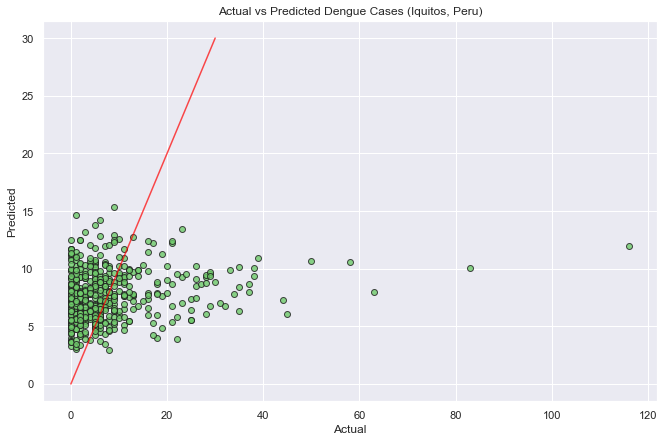

In [22]:
plt.subplots(figsize=(11,7))
plt.title('Actual vs Predicted Dengue Cases (Iquitos, Peru)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(data_iq.total_cases, data_iq.predicted, edgecolors = '#1e1e1e', color='#6ECA6A', alpha=0.8)
plt.plot([0, 30], [0, 30], 'red', alpha=0.7)

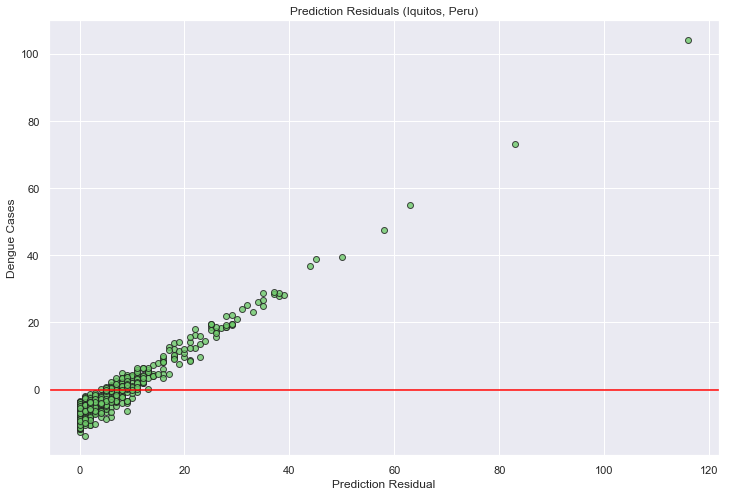

In [24]:
plt.subplots(figsize=(12,8))
plt.title('Prediction Residuals (Iquitos, Peru)')
plt.xlabel('Prediction Residual')
plt.ylabel('Dengue Cases')
plt.scatter(data_iq.total_cases, data_iq.total_cases - data_iq.predicted, edgecolors = '#1e1e1e', color='#6ECA6A', alpha=0.8)
plt.axhline(0, color='red')
plt.show()

As can be seen from the chart below the model fairly fits apart for weeks 30 to 40.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


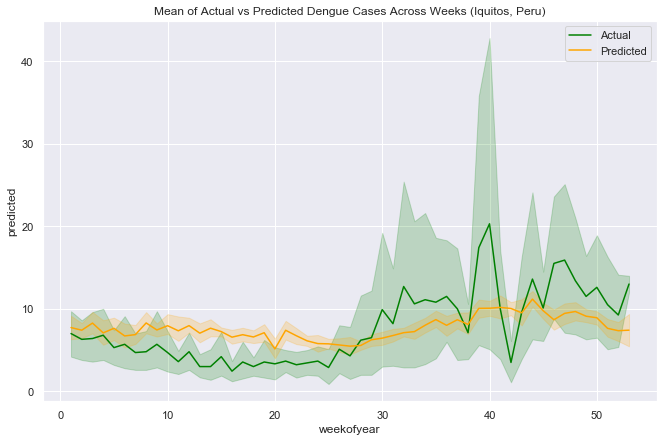

In [23]:
plt.subplots(figsize=(11,7))
plt.title('Mean of Actual vs Predicted Dengue Cases Across Weeks (Iquitos, Peru)')
sns.lineplot(x = 'weekofyear', y = 'total_cases', data = data_iq, label='Actual', color='Green')
sns.lineplot(x = 'weekofyear', y = 'predicted', data = data_iq, label='Predicted', color='Orange')

#### Correlation for San Juan

In [20]:
# Correlation for San Juan
data_sj.total_cases.corr(data_sj.predicted)

0.40058838151442416

#### Correlation for Iquitos

In [21]:
# Correlation for Iquitos
data_iq.total_cases.corr(data_iq.predicted)

0.19236271349843792

---
**Thank You**